# Analysing Relationship between Production and Years of Operation of Nuclear Reactors in USA

### Data obtained from data.gov


In [74]:
import pandas as pd
import datetime
import seaborn as sns

In [75]:
# After some initial removal of some columns that had been left blank in excel, the file has been imported as a dataframe.
# Since the column AK has a value which is simply being used for computation of other values in the dataset, only columns A to AJ have been taken.
data = pd.read_excel('reactors-operating.xls', usecols = 'A : AJ')

In [ ]:
display(data)

In [77]:
# Columns being removed: 
# Plant Name, Unit Number - the values under the column NRC Reactor Unit Web Page convey the same information in a consise way
# Docket Number - This is just a random unique number for identification and will not be necessary for Data Analysis
# License Number - This is also a unique identifier and is not essential for Data Analysis since NRC Reactor Unit Web Page is already there
# Parent Company Utility Name - Since Licensee and Parent Company Utility Name are almost the same, this is repetitive
# Parent Company Website - doesn't play a big role in changing the data
# Parent Company Notes - This column contains qualitative information, from which keywords could be extracted and represented using Integer Encoding, but since this column is null for most of the rows, this cannotbe used
# Architect-Engineer - This column has pretty much the same information as Constructor. Hence, repitition
# Note - Same reason as Parent Company Notes

data_new = data.drop(['Plant Name, Unit Number','Docket  Number','License Number','Parent Company Utility Name','Parent Company Website','Parent Company Notes','Architect-Engineer','Note'], axis=1)

In [ ]:
display(data_new)

In [ ]:
# Now we check if our data has any null values:

data_new.isnull().sum()

In [80]:
# For all the Capacities where null values are encountered, it can be replaced with 0 because it would mean that there was no production in those years.
# For the Renewed Operating License issued, I think the only value of significance would be the year (days and months are not unique and will result in skewed analysis)
# The null values here indicate that the license has not been renewed till the time the information was collected. So, a date in the future can be set for them. When the data in this column is normalised, all these will be treated as the same.

x = datetime.datetime(2020, 12, 31)
values = {
    '2014 Capacity Factor (Percent)': 0,
    '2013 Capacity Factor (Percent)': 0,
    '2012 Capacity Factor (Percent)': 0,
    '2011 Capacity Factor (Percent)': 0,
    '2010 Capacity Factor (Percent)': 0,
    '2009 Capacity Factor (Percent)': 0,
    '2008 Capacity Factor (Percent)': 0,
    '2005 Capacity Factor (Percent)': 0,
    '2004 Capacity Factor (Percent)': 0,
    '2003 Capacity Factor (Percent)': 0,
    'Renewed Operating License Issued': x
}
data_new.fillna(value=values, inplace=True)

In [81]:
# For all the columns involving dates, removing month and date and just keeping year:

date_columns = ['Construction Permit Issued', 'Operating License Issued', 'Commercial Operation', 'Renewed Operating License Issued', 'Operating License Expires']
for col in date_columns:
    year_array = []
    for date in data_new[col]:
        year_array.append(date.year)
    data_new[col] = year_array

In [ ]:
# For the first column: NRC Reactor Unit Web Page, the alphabet code and the number hold significance.
# It will be good to split in into 2 columns - one with the code that represents the Plant Name and another that represents the Unit Number

Plant_Name = []
Unit_Number = []

for entry in data_new['NRC Reactor Unit Web Page ']:
    separated = entry.split(" ")
    if(separated[-1].isnumeric()):
        Unit_Number.append(int(separated.pop()))
        Plant_Name.append(' '.join(separated))
    else:
        Unit_Number.append(1)
        Plant_Name.append(' '.join(separated))
data_new['Plant Name'] = Plant_Name
data_new['Unit Number'] = Unit_Number
data_new.drop(labels='NRC Reactor Unit Web Page ', axis=1, inplace=True)    

display(data_new)

In [ ]:
# Since only numbers can be computed, converting all the characteristic variables into numbers:

characteristic_vars = ['Location','Licensee','Reactor and Containment Type ','Nuclear Steam System Supplier and Design Type ','Constructor ','Plant Name']

data_numeric = data_new

for var in characteristic_vars:
    words = data_numeric[var]
    i = 1
    dict = {}
    for word in words:
        dict.update({word: i})  # This adds to the dictionary and if a key that has already been assigned is encountered, then it updates the value
        i+=1
    data_numeric[var] = data_numeric.applymap(lambda s: dict.get(s) if s in dict else s)

display(data_numeric)

In [ ]:
# The data now has only numeric values, but they are of different orders. If this kind of data is used for analysis, it may give skewed results.
# Hence the data is being scaled down to lie between 0 and 1

data_temp = data_numeric
data_scaled = data_numeric
for column in data_temp.columns:
    data_scaled[column] = data_temp[column]/data_temp[column].max()
display(data_scaled)

In [ ]:
# The correlation matrix will help to analyse if there are some variables that are very closely related. If so, those variables can be dropped (depending upon the aim of the analysis)

corr_matrix = data_scaled.corr()
display(corr_matrix)

In [ ]:
# Sorting the values obtained in the correlation matrix to try to get useful insights out of it

corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
display(sorted_pairs)

The pairs that have very high correlation are:
    # Operating License Issued and Years of Operation through 12/31/2019: -1.000000
    # Commercial Operation and Years of Operation through 12/31/2019: -0.993394
    # Commercial Operation and Operating License Issued: 0.993394
    # Construction Permit Issued and Commercial Operation: 0.790028
    # Construction Permit Issued and Operating License Issued: 0.788416
    # Construction Permit Issued and Years of Operation through 12/31/2019: -0.788416

From this we can conclude that the variables 
    # Operating License Issued 
    # Commercial Operation
    # Construction Permit Issued
have a very close correlation to Years of Operation through 12/31/2019
This is understandable because these three variables represent the quantities that would determine when the plant started its operations.
Hence if our aim is to see the effect of the other variables such as production in various years on the Years of Operation, it would be better to leave these variables out.

In [87]:
# Extracting the data that represents production in each of the years and the years of operation:

data_to_analyse = data_scaled[['NRC Region','2003 Capacity Factor (Percent)','2004 Capacity Factor (Percent)','2005 Capacity Factor (Percent)','2008 Capacity Factor (Percent)','2009 Capacity Factor (Percent)','2010 Capacity Factor (Percent)','2011 Capacity Factor (Percent)','2012 Capacity Factor (Percent)','2013 Capacity Factor (Percent)','2014 Capacity Factor (Percent)','2015 Capacity Factor (Percent)','2016 Capacity Factor (Percent)','2017 Capacity Factor (Percent)','2018 Capacity Factor (Percent)','Years of Operation through 12/31/2019']]

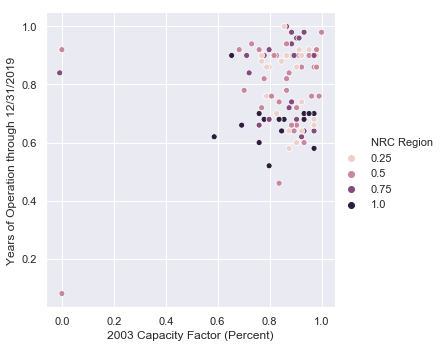

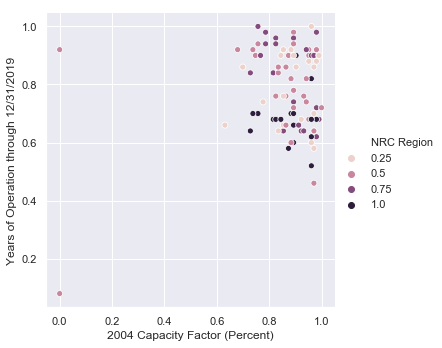

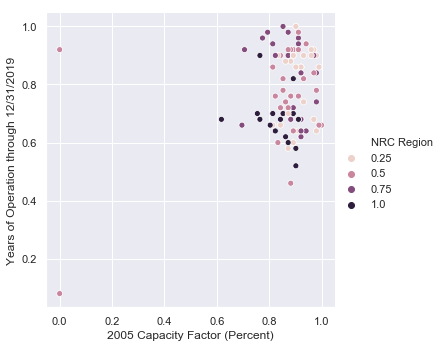

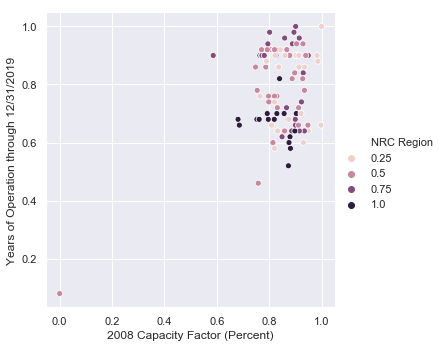

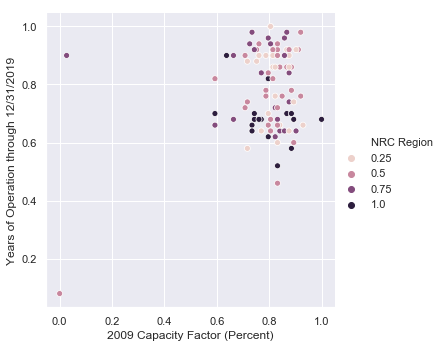

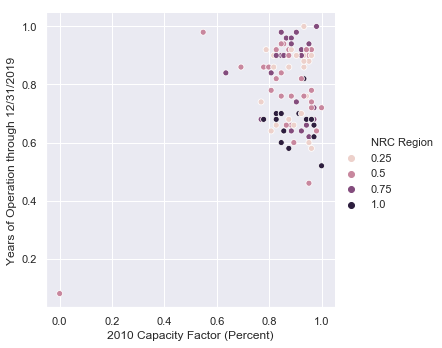

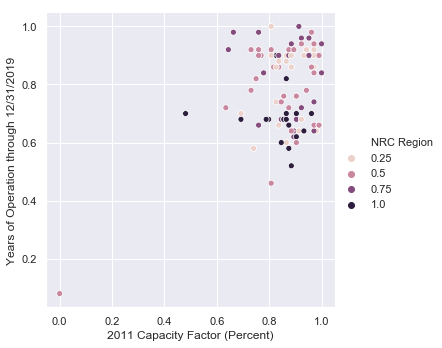

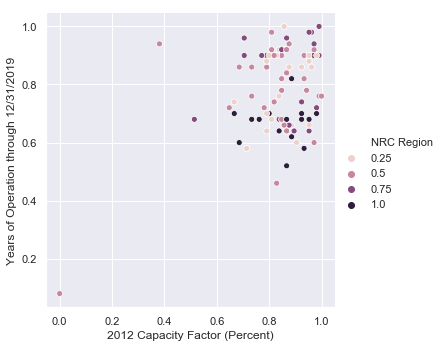

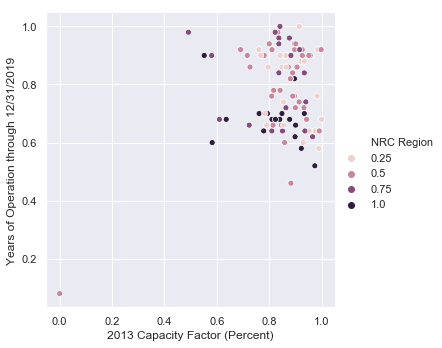

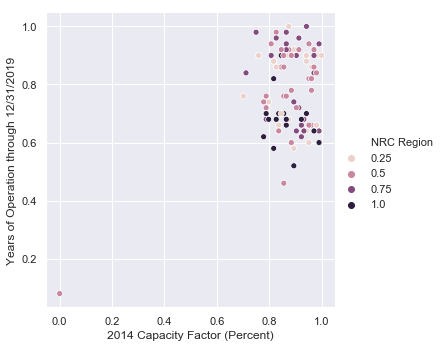

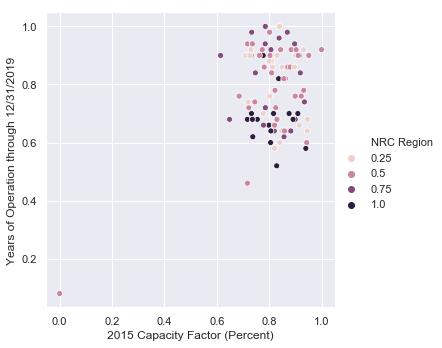

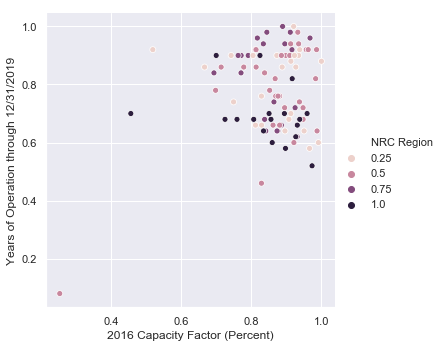

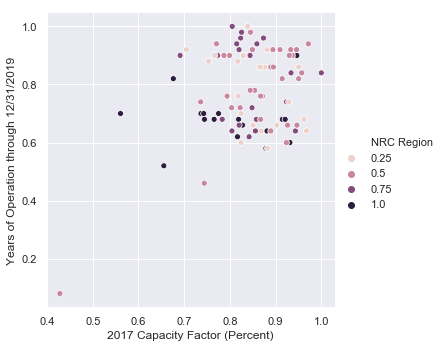

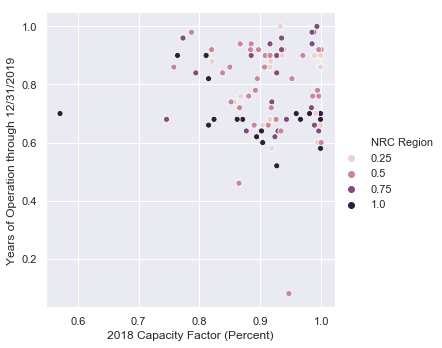

In [88]:
# Analysing if there is any pattern in production in a particular year and the years of operation 
# Given that there was a recession from 2008 into 2009, it is possible that companies that were greatly affected during this period may have had to close down operations

x_values = ['2003 Capacity Factor (Percent)','2004 Capacity Factor (Percent)','2005 Capacity Factor (Percent)','2008 Capacity Factor (Percent)','2009 Capacity Factor (Percent)','2010 Capacity Factor (Percent)','2011 Capacity Factor (Percent)','2012 Capacity Factor (Percent)','2013 Capacity Factor (Percent)','2014 Capacity Factor (Percent)','2015 Capacity Factor (Percent)','2016 Capacity Factor (Percent)','2017 Capacity Factor (Percent)','2018 Capacity Factor (Percent)']
for x in x_values:
    sns.relplot(x=x, y='Years of Operation through 12/31/2019', hue='NRC Region', data=data_to_analyse)

# Conclusion of Analysis

    # To a great extent, most plants maintained their production even through 2008 and 2009.
    # A few of them have had their production fall, but this hasn't affected their future much.
    # One company, did infact have very low production in 2009, but its production went up the next year, so there was no long-lasting impact.
    # Also, most of the plants whose production went down slightly during the recession of 2008 belonged to NRC Regions 3 and 4.
    # Another interesting observation is that the production of many plants has gone down in 2017 and 2018, irrespective of whether they have had many years of operation or not.